# Sentiment Analysis

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_text as text

In [6]:
data = pd.read_csv("Reddit_Data.csv")
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
data.clean_comment[50]

'are you guys seriously pissed about idli sambar remark thought were past all this second thoughts one gives shit about the tea party not even the their craziness got too much even for the hardcore republicans '

In [4]:
data.isna().sum()

clean_comment    100
category           0
dtype: int64

In [5]:
data = data[data.category!=0]
data.category.value_counts()

 1    15830
-1     8277
Name: category, dtype: int64

In [6]:
data.category = data.category.replace({1:1,-1:0})
data.category.value_counts()

1    15830
0     8277
Name: category, dtype: int64

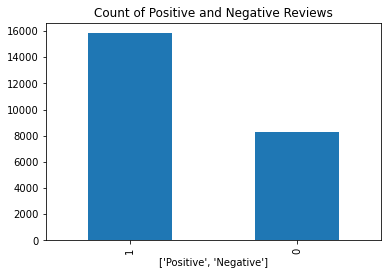

In [7]:
data.category.value_counts().plot(kind='bar');
plt.title("Count of Positive and Negative Reviews");
plt.xlabel(['Positive',"Negative"]);

In [8]:
data = data.sample(1200)

In [9]:
count_1, count_0 =data.category.value_counts()
print(count_1,count_0)

795 405


In [10]:
data_count_0 = data[data.category == 0]
data_count_1 = data[data.category == 1]

In [11]:
len(data_count_0)

405

In [12]:
len(data_count_1)

795

In [13]:
data_undersampled = data_count_1.sample(count_0)
finaldata = pd.concat([data_undersampled,data_count_0])
finaldata.category.value_counts()

1    405
0    405
Name: category, dtype: int64

In [14]:
X = data.drop(['category'],axis =1)
X.head()

,clean_comment
1259,newly released sat image the image field 76km ...
28044,feels nice and all but find cyber attacks ran...
824,are you corrupt mind please sir what does tha...
7446,videocon videoind exited the telecom services...
125,social media technology from the west


In [15]:
y = data['category']
y.head()

1259     1
28044    1
824      0
7446     0
125      1
Name: category, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [18]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [75]:
inputs = keras.layers.Input(shape = (), dtype= tf.string, name = 'input')
preprocessed_text = bert_preprocess(inputs)
output = bert_encoder(preprocessed_text)

l = keras.layers.Dropout(0.1, name='dropout')(output['pooled_output'])
l = keras.layers.Dense(10, name = 'hidden')(l)
l = keras.layers.Dense(1, activation='sigmoid')(l)

model = keras.Model([inputs],[l])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=5)

Epoch 1/5
30/30 [==============================] - 217s 7s/step - loss: 0.6918 - accuracy: 0.6073
Epoch 2/5
30/30 [==============================] - 215s 7s/step - loss: 0.6579 - accuracy: 0.6333
Epoch 3/5
30/30 [==============================] - 218s 7s/step - loss: 0.6639 - accuracy: 0.6198
Epoch 4/5
30/30 [==============================] - 225s 7s/step - loss: 0.6707 - accuracy: 0.6302
Epoch 5/5
30/30 [==============================] - 226s 8s/step - loss: 0.6602 - accuracy: 0.6344


In [83]:
def get_sentiment(text):
    sen = model.predict(text)
    for i  in sen:
        if i>0.69:
            print("Positive Sentiment")
        else:
            print("Negative Sentiment")

In [84]:
get_sentiment(["This is very tragic"])

1/1 [==============================] - 0s 327ms/step
Negative Sentiment


In [88]:
get_sentiment(["I am very happy today!"])

1/1 [==============================] - 0s 305ms/step
Positive Sentiment


In [89]:
get_sentiment(["If you want to make your life happy, work for it!"])

1/1 [==============================] - 0s 304ms/step
Positive Sentiment


In [91]:
get_sentiment(["My friend died in a car accident"])

1/1 [==============================] - 0s 307ms/step
Negative Sentiment
